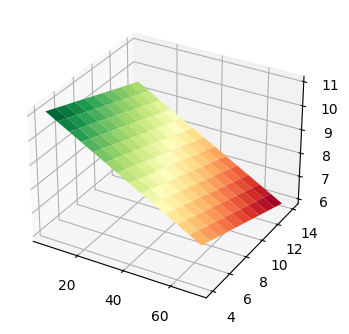

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 4))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(5, 75, 5) #список значений х
y = np.arange(4, 15, 1) #список значений у
xgrid, ygrid = np.meshgrid(x,y)

zgrid = 12.0445-0.0547*xgrid-0.1652*ygrid #фунция

ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap ='RdYlGn') #создание поверхности и настройка цвета

plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                 -0.206
Method:                 Least Squares   F-statistic:                    0.3165
Date:                Fri, 16 Aug 2024   Prob (F-statistic):              0.740
Time:                        17:24:22   Log-Likelihood:                -14.598
No. Observations:                   9   AIC:                             35.20
Df Residuals:                       6   BIC:                             35.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5033      1.937      4.389      0.0

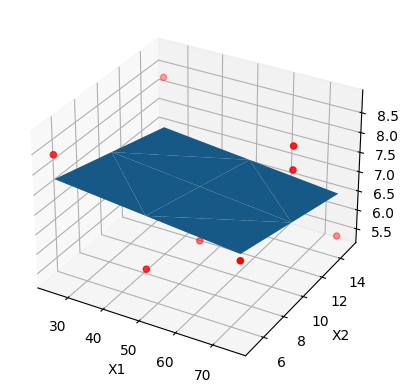

In [2]:
#Множественная регрессия, статистический анализ с выводами и построение графика

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создание фрейма данных
data = {'X1': [75, 75, 25, 25, 50, 75, 75, 50, 50],
        'X2': [5, 15, 5, 15, 10, 10, 10, 15, 5],
        'Y': [7.198, 5.382, 8.436, 8.281, 5.767, 8.235, 8.817, 5.654, 6.268]}
df = pd.DataFrame(data)

# Добавление константы для учёта свободного члена в модели
X = sm.add_constant(df[['X1', 'X2']])
Y = df['Y']

# Построение модели множественной регрессии
model = sm.OLS(Y, X).fit()

# Вывод результатов регрессии
print(model.summary())

# Построение поверхности отклика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = df['X1']
x2 = df['X2']
y = df['Y']

ax.scatter(x1, x2, y, c='r', marker='o')

x1_surf, x2_surf = np.meshgrid(x1, x2)
exog = pd.core.frame.DataFrame({'X1': x1_surf.ravel(), 'X2': x2_surf.ravel()})
out = model.predict(exog = sm.add_constant(exog))

ax.plot_trisurf(exog['X1'], exog['X2'], out, linewidth=0.2, antialiased=True)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()
